Datos de entrenamiento: [ 7.05620938  1.70163893  4.11697214  9.2666031   7.87427236 -3.40406101
  4.40641428  0.10164187  0.3952054   2.55148492  1.58627529  6.92820514
  4.25627211  1.79983138  3.18959435  2.84984882  7.59247791  0.89653866
  3.07045262 -1.49719104 -8.19175724  4.7356865   5.67996702 -0.64542776
 11.50326092 -3.29221017  2.8092967   1.97853733  8.95939969  8.80672801
  3.65009273  4.64396321 -0.31881976 -4.58985254  2.04269484  4.16074941
  8.55752636  8.54689313  2.28907657  2.73018294 -0.15380782 -1.53865761
 -2.58265652 12.14653592  2.40583572  2.79315734 -0.36471679  7.85743617
 -1.60710654  4.09853383  1.46863881  6.69912514  3.2093047   0.63100662
  5.34181654  7.26888304  5.92263455  6.96746335  3.32129748  4.5086313
  3.37076427  4.72340352  3.01004113 -0.54149405  7.17435103  4.95853282
  0.14587328  8.61880579  3.23949341  7.17747855  9.98706932  7.68764881
 11.83033001  2.43443409  9.08411404  4.83651721  4.19357908  5.46237912
  6.63257775  8.20445935  3.

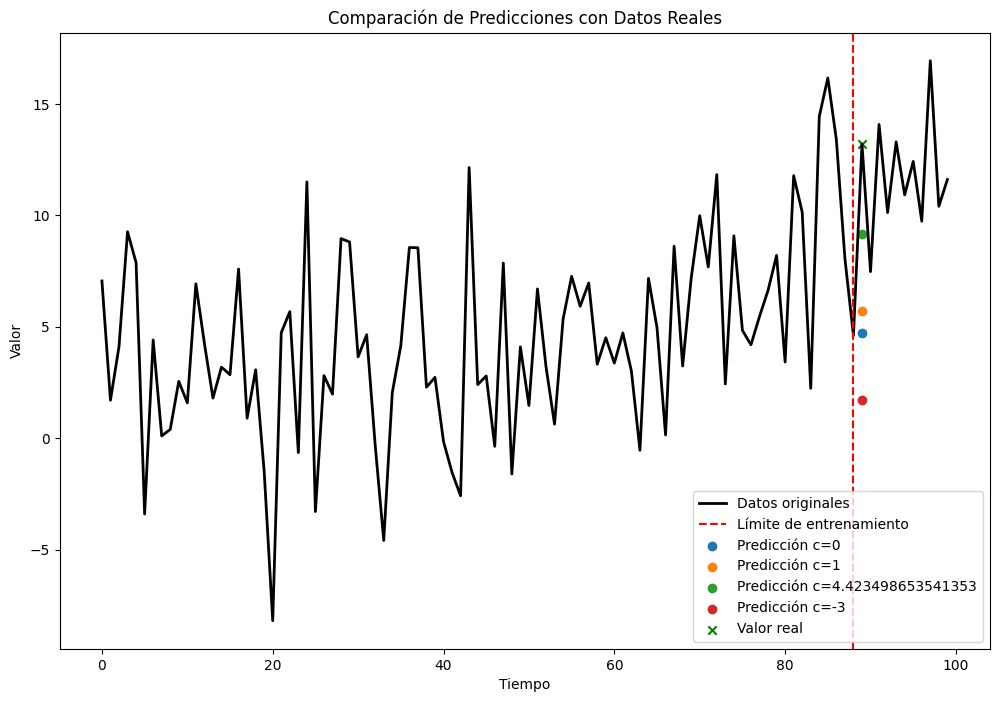

In [ ]:
# 3. IMPLEMENTACION DE LA ECUACION
import numpy as np
import matplotlib.pyplot as plt

# Datos originales
np.random.seed(0)
n_points = 100
trend = np.linspace(0, 10, n_points)
noise = np.random.normal(0, 4, n_points)
data = trend + noise

# Eliminar los últimos datos
data_train = data[:-11]
data_test = data[-11:]
print("Datos de entrenamiento:", data_train)
print("Datos de prueba:", data_test)

# Modelo de predicción
def predict_next(data, a, b, c):
    return a * data[-1] + b * data[-2] + c

# Parámetros del modelo
a = 0.5
b = 0.3
c_values = [0, 1, np.mean(data_train), -3]

# Predicciones
predictions = {}
for c in c_values:
    next_value_pred = predict_next(data_train, a, b, c)
    predictions[c] = next_value_pred

print("Predicciones para el próximo valor con diferentes c:")
for c, pred in predictions.items():
    print(f"c = {c}: Predicción = {pred}")

# Comparar predicciones con el primer valor de datos de prueba
actual_next_value = data_test[0]
print(f"Valor real del próximo dato: {actual_next_value}")

# Mostrar resultados
plt.figure(figsize=(12, 8))
plt.plot(range(len(data)), data, label='Datos originales', color='black', linewidth=2)
plt.axvline(x=len(data_train)-1, color='red', linestyle='--', label='Límite de entrenamiento')

# Graficar predicciones y valor real
for c, pred in predictions.items():
    plt.scatter(len(data_train), pred, label=f'Predicción c={c}', marker='o')

plt.scatter(len(data_train), actual_next_value, color='green', label='Valor real', marker='x')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Comparación de Predicciones con Datos Reales')
plt.legend()
plt.show()

In [ ]:
# 5. IMPLEMENTACION CLASES DE EQUIVALENCIA
import numpy as np
import matplotlib.pyplot as plt

# Datos originales
np.random.seed(0)
n_points = 100
trend = np.linspace(0, 10, n_points)
noise = np.random.normal(0, 4, n_points)
data = trend + noise

# Eliminar los últimos datos
data_train = data[:-11]
data_test = data[-11:]

# Definir la relación de equivalencia por proximidad
def equivalence_classes(data, epsilon):
    classes = []
    for value in data:
        assigned = False # Crea una variable booleana llamada assigned, que se utiliza para verificar si el valor actual ha sido asignado a una clase de equivalencia existente.
        for eq_class in classes: # Inicia un bucle que recorre cada clase de equivalencia en la lista classes.
            if abs(eq_class[0] - value) <= epsilon: # Compara el valor actual (value) con el primer valor de la clase de equivalencia actual (eq_class[0]). Utiliza el umbral de proximidad epsilon para determinar si el valor actual está suficientemente cerca del primer valor de la clase actual (es decir, si la diferencia absoluta es menor o igual a epsilon).
                eq_class.append(value) # Si el valor actual está dentro del umbral de proximidad (epsilon), añade el valor a la clase de equivalencia actual (eq_class).
                assigned = True # Cambia la variable assigned a True, indicando que el valor ha sido asignado a una clase de equivalencia.
                break
        if not assigned: # Después de intentar asignar el valor a una clase existente, verifica si el valor no fue asignado a ninguna clase (es decir, assigned es False)
            classes.append([value]) # Si el valor no fue asignado a ninguna clase existente, crea una nueva clase de equivalencia con el valor actual y la añade a la lista classes.
    return classes

# Ajustar el parámetro de proximidad
epsilon = 2  # Ajustar según la escala de los datos

# Obtener clases de equivalencia
classes = equivalence_classes(data_train, epsilon)

# Imprimir las clases de equivalencia
print("Clases de equivalencia:")
for cls in classes:
    print(cls)

def predict_class(data, epsilon):
    if len(data) < 2:
        raise ValueError("Necesitas al menos dos puntos de datos para la predicción.")

    # Calcular la predicción del siguiente valor usando un modelo lineal
    a, b = 0.5, 0.3  # Parámetros del modelo
    c = np.mean(data)  # Cálculo de c basado en la media de los datos de entrenamiento
    next_value_pred = a * data[-1] + b * data[-2] + c

    # Encontrar la clase de equivalencia más cercana
    min_distance = float('inf')
    predicted_class = None

    for cls in classes:
        class_center = np.mean(cls)
        distance = abs(class_center - next_value_pred)
        if distance < min_distance:
            min_distance = distance
            predicted_class = cls

    return predicted_class

# Predicción de la clase de equivalencia para el siguiente valor
predicted_class = predict_class(data_train, epsilon)

# Imprimir los resultados
print("Clase de equivalencia predicha:")
print(predicted_class)
print(f"Valor real del próximo dato: {data_test[0]}")

Clases de equivalencia:
[7.056209383870656, 7.874272364640274, 6.928205138963012, 7.59247790879204, 5.679967017660245, 8.959399685716658, 8.80672800889407, 8.557526359274519, 8.546893132511382, 7.857436170802387, 6.6991251429522, 5.341816541190835, 7.2688830376772255, 5.922634546098328, 6.967463348534883, 7.174351033661476, 8.618805789779865, 7.177478552881525, 7.687648814746814, 5.462379118720116, 6.632577750278388, 8.204459348716961, 8.068179444629383]
[1.7016389344789942, 0.10164187387991552, 0.3952054009065767, 2.5514849168443985, 1.5862752947445222, 1.7998313791026268, 3.189594345123117, 2.8498488246485825, 0.8965386621085136, 3.070452624785424, 2.8092966954684107, 1.9785373271693927, 3.6500927330906956, 2.042694837038824, 2.289076568752029, 2.7301829370925974, -0.1538078198643298, 2.4058357174378306, 2.7931573390097997, 1.4686388057303477, 3.2093047022497605, 0.6310066170457054, 3.3212974838620037, 3.3707642695022564, 3.010041134448446, 0.14587327880248857, 3.2394934111538998, 2.

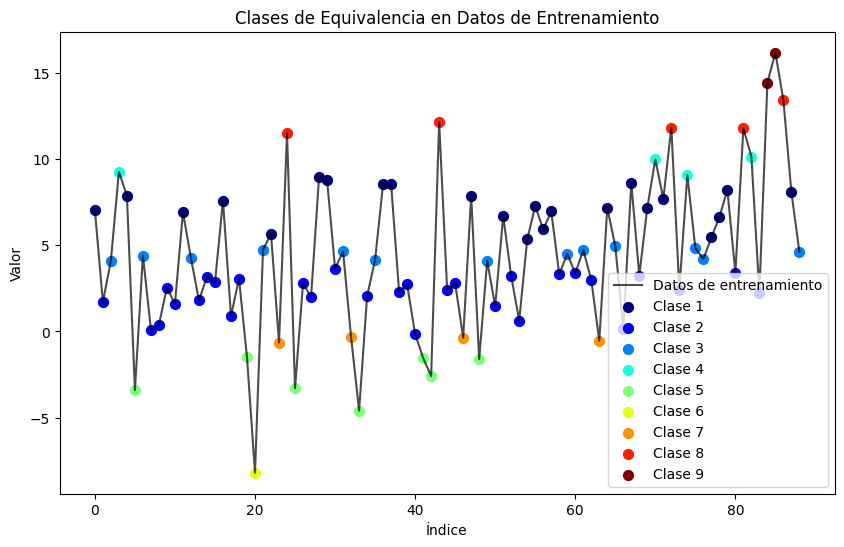

Clase de equivalencia predicha:
[9.266603099836134, 9.987069319417218, 9.08411403945767, 10.14547804175012]
Valor real del próximo dato: 13.207705897623537


In [ ]:
# CLASES DE EQUIVALENCIA CON GRAFICO

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n_points = 100
trend = np.linspace(0, 10, n_points)
noise = np.random.normal(0, 4, n_points)
data = trend + noise

data_train = data[:-11]
data_test = data[-11:]

def equivalence_classes(data, epsilon):
    classes = []
    for value in data:
        assigned = False
        for eq_class in classes:
            if abs(eq_class[0] - value) <= epsilon:
                eq_class.append(value)
                assigned = True
                break
        if not assigned:
            classes.append([value])
    return classes

epsilon = 2

classes = equivalence_classes(data_train, epsilon)

plt.figure(figsize=(10, 6))
plt.plot(data_train, label='Datos de entrenamiento', color='black', alpha=0.7)

colors = plt.cm.jet(np.linspace(0, 1, len(classes)))

for i, cls in enumerate(classes):
    indices = [data_train.tolist().index(val) for val in cls]
    plt.scatter(indices, cls, label=f'Clase {i+1}', color=colors[i], s=50)

plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Clases de Equivalencia en Datos de Entrenamiento')
plt.legend()
plt.show()

def predict_class(data, epsilon):
    if len(data) < 2:
        raise ValueError("Necesitas al menos dos puntos de datos para la predicción.")

    a, b = 0.5, 0.3
    c = np.mean(data)
    next_value_pred = a * data[-1] + b * data[-2] + c

    min_distance = float('inf')
    predicted_class = None

    for cls in classes:
        class_center = np.mean(cls)
        distance = abs(class_center - next_value_pred)
        if distance < min_distance:
            min_distance = distance
            predicted_class = cls

    return predicted_class

predicted_class = predict_class(data_train, epsilon)

print("Clase de equivalencia predicha:")
print(predicted_class)
print(f"Valor real del próximo dato: {data_test[0]}")


In [93]:
# SIMULAR TEMPERATURAS

import numpy as np

# Parámetros
num_days = 360 * 2  # Dos años
base_temp_summer = 30  # Temperatura base en verano
base_temp_winter = 10  # Temperatura base en invierno
base_temp_spring = 30  # Temperatura base en primavera
base_temp_fall = 10  # Temperatura base en otoño
amplitude = 3  # Amplitud de la variación estacional
noise_level = 2  # Nivel de ruido aleatorio

# Crear un array de días
days = np.arange(num_days)

# Calcular la temperatura base para cada día, variando por estación
base_temp = np.where(
    (days % 360 < 90),
    base_temp_fall,# Otoño
    np.where(
        (days % 360 < 180), # Invierno
        base_temp_winter,
        np.where(
            (days % 360 < 270),
            base_temp_spring, # Primavera
            base_temp_summer # Verano
        )
    )
)

# Simular temperaturas con variación estacional y ruido
temperatures = base_temp + amplitude * np.sin(2 * np.pi * days / 90) + np.random.normal(0, noise_level, num_days)

# Eliminar los últimos 90 días para prueba
data_train = temperatures[:-179]
data_test = temperatures[-179:]

In [99]:
#PREDICCION BASICA

predict_next(data_train, 0.2, 0.1, np.mean(data_train))

23.987691529270748

In [47]:
# 7. IMPLEMENTACION EXPONENCIACION MODULAR

def predict_cyclic_data_with_modular_exponentiation(data, day_to_predict, period, cycle_duration):
    # Selección del dato basado en aritmética modular
    index = day_to_predict % period
    base = data[index]  # Dato seleccionado del array
    exponent = cycle_duration  # Exponente como cada cuanto varia considerablemente la temperatura
    modulus = period  # Período cíclico como módulo

    # Exponenciación modular
    result = 1 # Crea una variable llamada result y la inicializa a 1. Esta variable almacenará el resultado final de la exponenciación modular.
    base = base % modulus # Reduce base módulo modulus. Esto asegura que base sea menor que modulus, lo cual puede simplificar el cálculo y evitar números excesivamente grandes.
    while exponent > 0: # Inicia un bucle que continuará mientras el exponent sea mayor que 0. Dentro del bucle, se realiza el cálculo de la exponenciación modular de manera iterativa.
        if (exponent % 2) == 1: # Verifica si el exponent es impar usando la operación exponent % 2. Si el exponent es impar, entra en el bloque de código correspondiente.
            result = (result * base) % modulus # Si el exponent es impar, multiplica result por base, y luego toma el módulo modulus del resultado. Esto asegura que el valor de result permanezca manejable y dentro del rango del módulo.
        exponent = exponent >> 1 # Reduce el exponent dividiéndolo entre 2 utilizando el desplazamiento de bits a la derecha (>> 1). Esto es equivalente a una división entera por 2. Esta operación reduce la magnitud del exponent en cada iteración del bucle.
        base = (base * base) % modulus # Eleva base al cuadrado y luego toma el módulo modulus. Esta operación ajusta base para el siguiente paso del cálculo. Al elevar base al cuadrado, se reduce el número de multiplicaciones necesarias en el cálculo de la exponenciación modular.

    return result

In [97]:
predict_cyclic_data_with_modular_exponentiation(data_train, 542, 360, 180)

31.828729403765465

In [101]:
print(data_test[1])

30.778567288310068
